In [1]:
library(data.table)
library(ggplot2)
library(stringr)
library(scales)
library(cowplot)
library(ggpubr)
library(MASS)
library(dplyr)

options(repr.matrix.max.cols=150)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
cells = fread("tables/cells.csv")
cells = as.data.frame(cells)

In [3]:
regions = fread("tables/regions.csv")
regions = as.data.frame(regions)

In [4]:
cells[1, ]

,Image,Object ID,Object type,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,Solidity,Max diameter µm,Min diameter µm,Channel 1: Mean,Channel 1: Median,Channel 1: Min,Channel 1: Max,Channel 1: Std.Dev.,Channel 2: Mean,Channel 2: Median,Channel 2: Min,Channel 2: Max,Channel 2: Std.Dev.,Channel 3: Mean,Channel 3: Median,Channel 3: Min,Channel 3: Max,Channel 3: Std.Dev.,Channel 4: Mean,Channel 4: Median,Channel 4: Min,Channel 4: Max,Channel 4: Std.Dev.,Channel 5: Mean,Channel 5: Median,Channel 5: Min,Channel 5: Max,Channel 5: Std.Dev.,Channel 6: Mean,Channel 6: Median,Channel 6: Min,Channel 6: Max,Channel 6: Std.Dev.,Channel 7: Mean,Channel 7: Median,Channel 7: Min,Channel 7: Max,Channel 7: Std.Dev.,Channel 8: Mean,Channel 8: Median,Channel 8: Min,Channel 8: Max,Channel 8: Std.Dev.,DAPI_mean,TCRgd_mean,MUC6_mean,CD4_mean,CD3_mean,CD8_mean,AF_mean,Tmax_mean,annot,gland_annot,image_gland_annot
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff,9a7c33ba-1627-4aa3-bcfa-546f7a700169,Detection,region1,Polygon,9433,7217.4,109.6227,40.5373,0.8383,0.9638,14.5764,10.2773,3.3341,0,0,25,5.3989,0.4523,0,0,7,1.0424,0.2045,0,0,39,2.2627,7.3114,5,0,43,6.7105,36.8795,36,7,88,14.816,0.0045,0,0,1,0.0673,33.1955,32,16,71,8.8854,37.125,36,7,88,14.6239,3.3341,0.4523,0.2045,7.3114,36.8795,0.0045,33.1955,37.125,CD3+ CD4- CD8- TCRgd-,NA,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff:NA


In [5]:
regions[1, ]

,image_id,image_name,roi_id,shape_id,type,z,t,channel,area (µm²),length (µm),points,min,max,sum,mean,std_dev,Text,Points,counts_CD3+ CD4- CD8- TCRgd-,counts_CD3+ CD4+ TCRgd- CD8-,counts_CD3+ CD8+ TCRgd- CD4-,counts_CD3+ TCRgd+ CD4- CD8-,counts_NA,area_um2
,<int>,<chr>,<int>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,42598,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],36302,40148,polyline,NA,NA,NA,NA,487.278,NA,NA,NA,NA,NA,NA,MUC6_region2a,"13517.75,12628.27 13518.09,12593.15 13526.64,12552.45 13536.16,12531.74 13588.15,12491.79 13637.78,12447.95 13656.83,12436.33 13682.61,12426.86 13698.84,12424.56 13751.59,12424.03 13767.00,12426.74 13784.86,12433.51 13801.83,12445.99 13818.19,12465.10 13830.50,12488.42 13833.82,12504.70 13833.82,12564.82 13831.11,12575.86 13798.10,12630.20 13784.80,12646.67 13752.53,12665.02 13719.76,12666.90 13681.60,12658.46 13657.78,12657.98 13643.40,12665.05 13617.84,12687.90 13601.69,12689.37 13584.01,12685.16 13546.56,12669.41 13529.21,12654.81 13517.25,12619.02 13515.39,12590.28",1,0,5,9,10,15503.44


In [6]:
# Get count matrix of segmented cells
count_mat = regions[, grep("counts_", colnames(regions))]

colnames(count_mat) = str_remove(colnames(count_mat), "counts_")

In [7]:
# # Plot distribution of mapped cells by gland
# #options(repr.plot.width = 12, repr.plot.height = 5)
# #barplot(sort(apply(count_mat, 1, sum), decreasing=TRUE), space=0, col="royalblue3", xlab="Region", ylab="T cells")

# # Split by control vs non-control

# options(repr.plot.width = 16, repr.plot.height = 5)

# par(mfrow=c(1, 2))

# ylim = c(0, 45)

# control_regions = grepl("control", regions$Text)

# barplot(sort(apply(count_mat, 1, sum)[control_regions], decreasing=TRUE), space=0, col="royalblue3", xlab="Gland region", ylab="T cells", main="Control", ylim=ylim)
# barplot(sort(apply(count_mat, 1, sum)[!control_regions], decreasing=TRUE), space=0, col="tomato3", xlab="Gland region", ylab="T cells", main="MUC6+", ylim=ylim)

In [8]:
# Counts of all segmented T cells
count_mat$cell_all = apply(count_mat, 1, sum)

# Copy total cell count to regions data frame
regions$cell_all = count_mat$cell_all

In [9]:
# Count validated T cells: CD3+ CD4+, CD3+ CD8+, or CD3+ TCRgd+segm
count_mat$Tcell_all = apply(regions[, c("counts_CD3+ CD4+ TCRgd- CD8-", "counts_CD3+ CD8+ TCRgd- CD4-", "counts_CD3+ TCRgd+ CD4- CD8-")], 1, sum)
regions$Tcell_all = count_mat$Tcell_all

In [10]:
# Compute T cell counts excluding CD3+ rest-
#regions$Tcell_noCD3rest = regions$Tcell_all - regions[, "counts_CD3+ CD4- CD8- TCRgd-"]

In [11]:
# Normalize T cell counts by area
count_norm = sweep(count_mat, 1, regions$area_um2, "/")

# Normalized by length
#count_norm = sweep(count_mat, 1, regions$`length (µm)`, "/")

# no normalization
#count_norm = count_mat

In [12]:
# Specify control vs MUC6+ in column
control_regions = grepl("control", regions$Text)

count_norm$gland[control_regions] = "Control"
count_norm$gland[!control_regions] = "MUC6+"

In [13]:
# transfer image names to normalized data.frame
count_norm$image = regions$image_name

In [14]:
head(count_norm)

,CD3+ CD4- CD8- TCRgd-,CD3+ CD4+ TCRgd- CD8-,CD3+ CD8+ TCRgd- CD4-,CD3+ TCRgd+ CD4- CD8-,NA,cell_all,Tcell_all,gland,image
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,6.450181e-05,0,3.225090e-04,0.0005805163,0.0006450181,0.0016125452,0.0009030253,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
2,9.805735e-05,0,9.805735e-05,0.0001961147,0.0003922294,0.0007844588,0.0002941721,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
3,2.431025e-04,0,1.215512e-04,0.0006077562,0.0013370636,0.0023094735,0.0007293074,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
4,0.000000e+00,0,5.745165e-04,0.0000000000,0.0017235496,0.0022980661,0.0005745165,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
5,3.637451e-04,0,0.000000e+00,0.0005456177,0.0003637451,0.0012731079,0.0005456177,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
6,0.000000e+00,0,3.406632e-04,0.0003406632,0.0010219895,0.0017033158,0.0006813263,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]


In [15]:
tab = melt(count_norm, value.name = "cell_density")

head(tab)

Warning message in melt(count_norm, value.name = "cell_density"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(count_norm). In the next version, this warning will become an error.”
Using gland, image as id variables



,gland,image,variable,cell_density
,<chr>,<chr>,<fct>,<dbl>
1,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,6.450181e-05
2,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,9.805735e-05
3,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,2.431025e-04
4,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,0.000000e+00
5,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,3.637451e-04
6,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,0.000000e+00


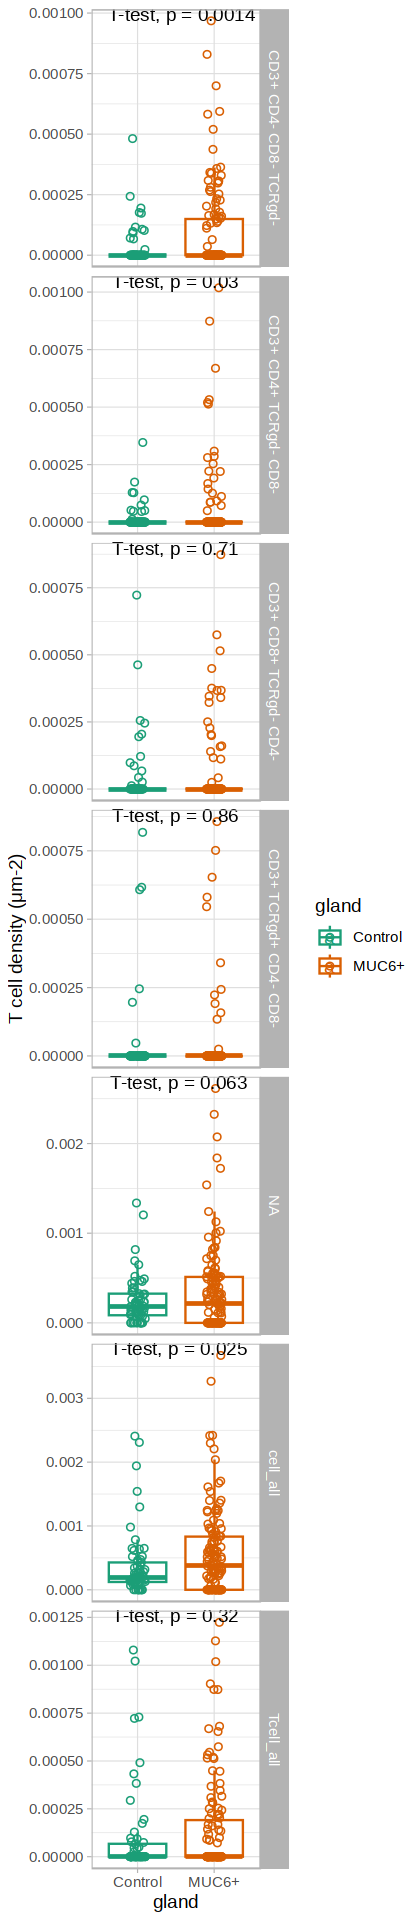

In [16]:
options(warn=-1)  # temporarily suppress warnings

width=3.5; height=16
options(repr.plot.width = width, repr.plot.height = height)

ggplot(tab, aes(x=gland, y=cell_density, col=gland)) +
    facet_grid(variable~., scales="free_y") +
    #facet_grid(variable~image, scales="free_y") +

    geom_boxplot(outlier.shape = NA) +  # hide outlier
    geom_jitter(width = 0.1, pch=21) +
    stat_compare_means(method = "t.test") +

    #theme_classic()
    ylab("T cell density (μm-2)") +
    theme_light() +
    scale_color_brewer(palette = "Dark2")

ggsave("plots/T_cell_density_boxplot.pdf", width=width, height=height)

options(warn=0)

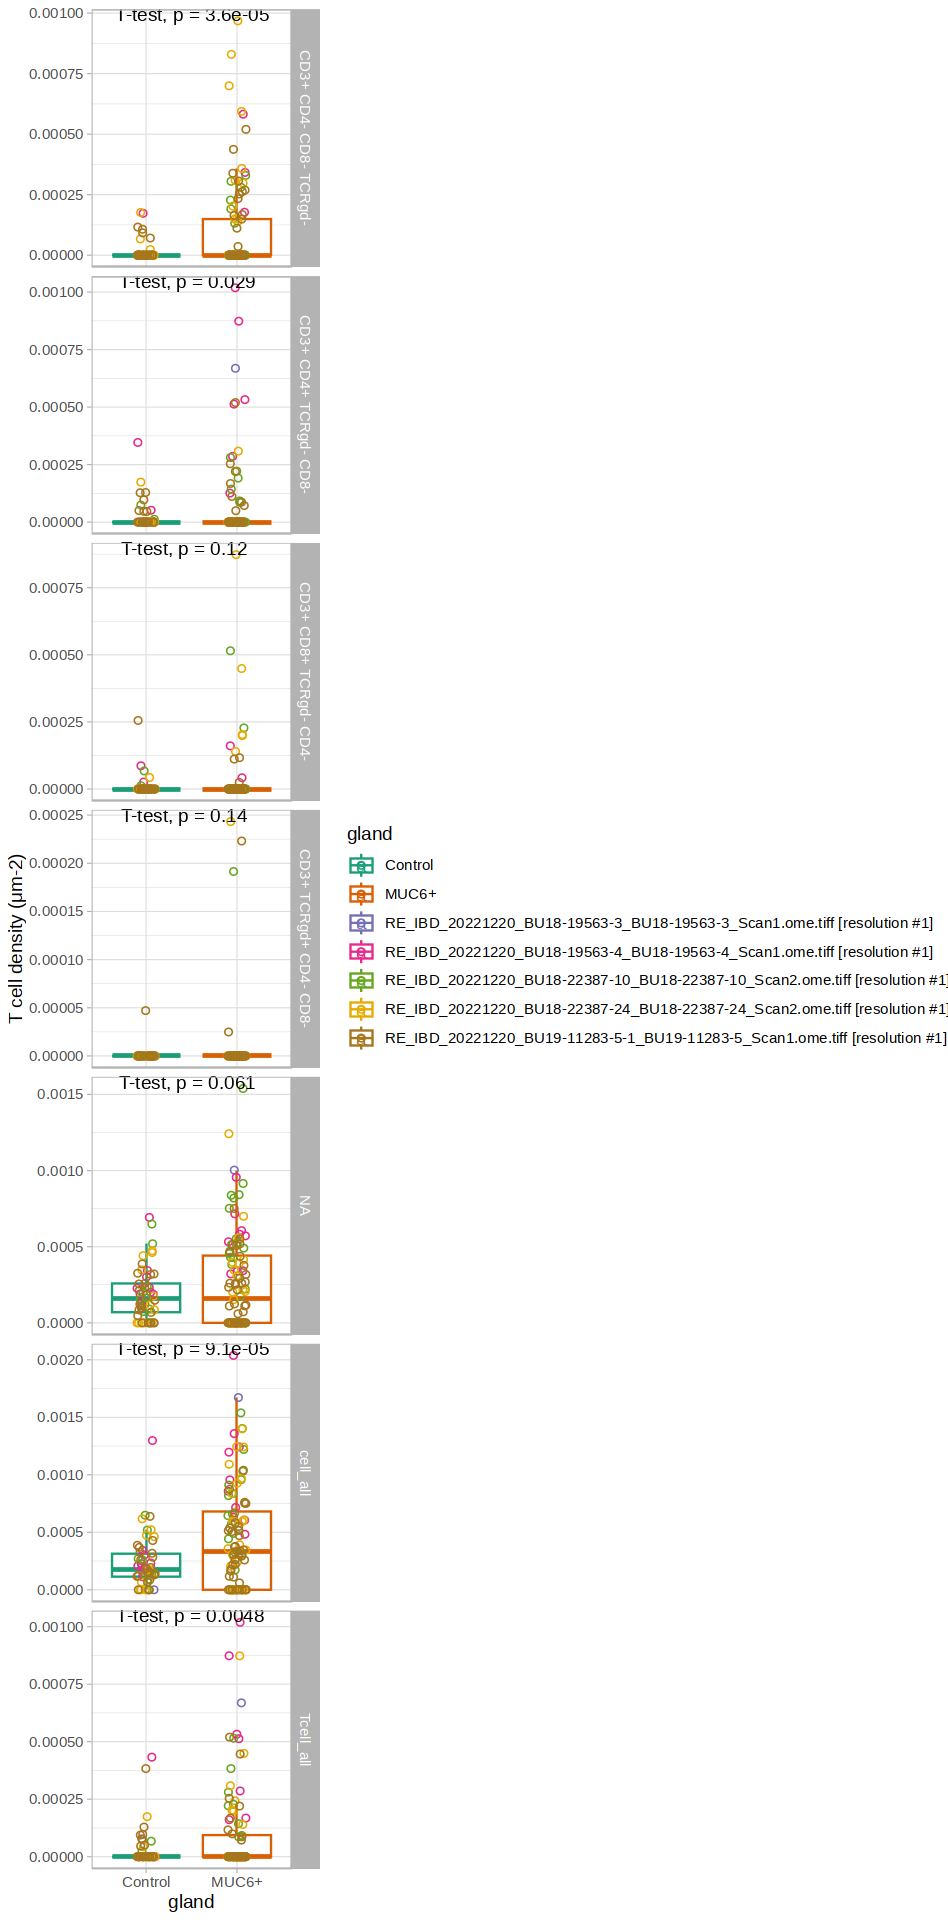

In [17]:

options(warn=-1)  # temporarily suppress warnings

width=7.9; height=16
options(repr.plot.width = width, repr.plot.height = height)

ggplot(tab %>% filter(image != "RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]"),
        aes(x=gland, y=cell_density, col=gland)) +
    facet_grid(variable~., scales="free_y") +
    #facet_grid(variable~image, scales="free_y") +

    geom_boxplot(outlier.shape = NA) +  # hide outlier
    geom_jitter(aes(col=image), width = 0.1, pch=21) +
    stat_compare_means(method = "t.test") +

    #theme_classic()
    ylab("T cell density (μm-2)") +
    theme_light() +
    scale_color_brewer(palette = "Dark2")

ggsave("plots/T_cell_density_CD_boxplot.pdf", width=width, height=height)

options(warn=0)

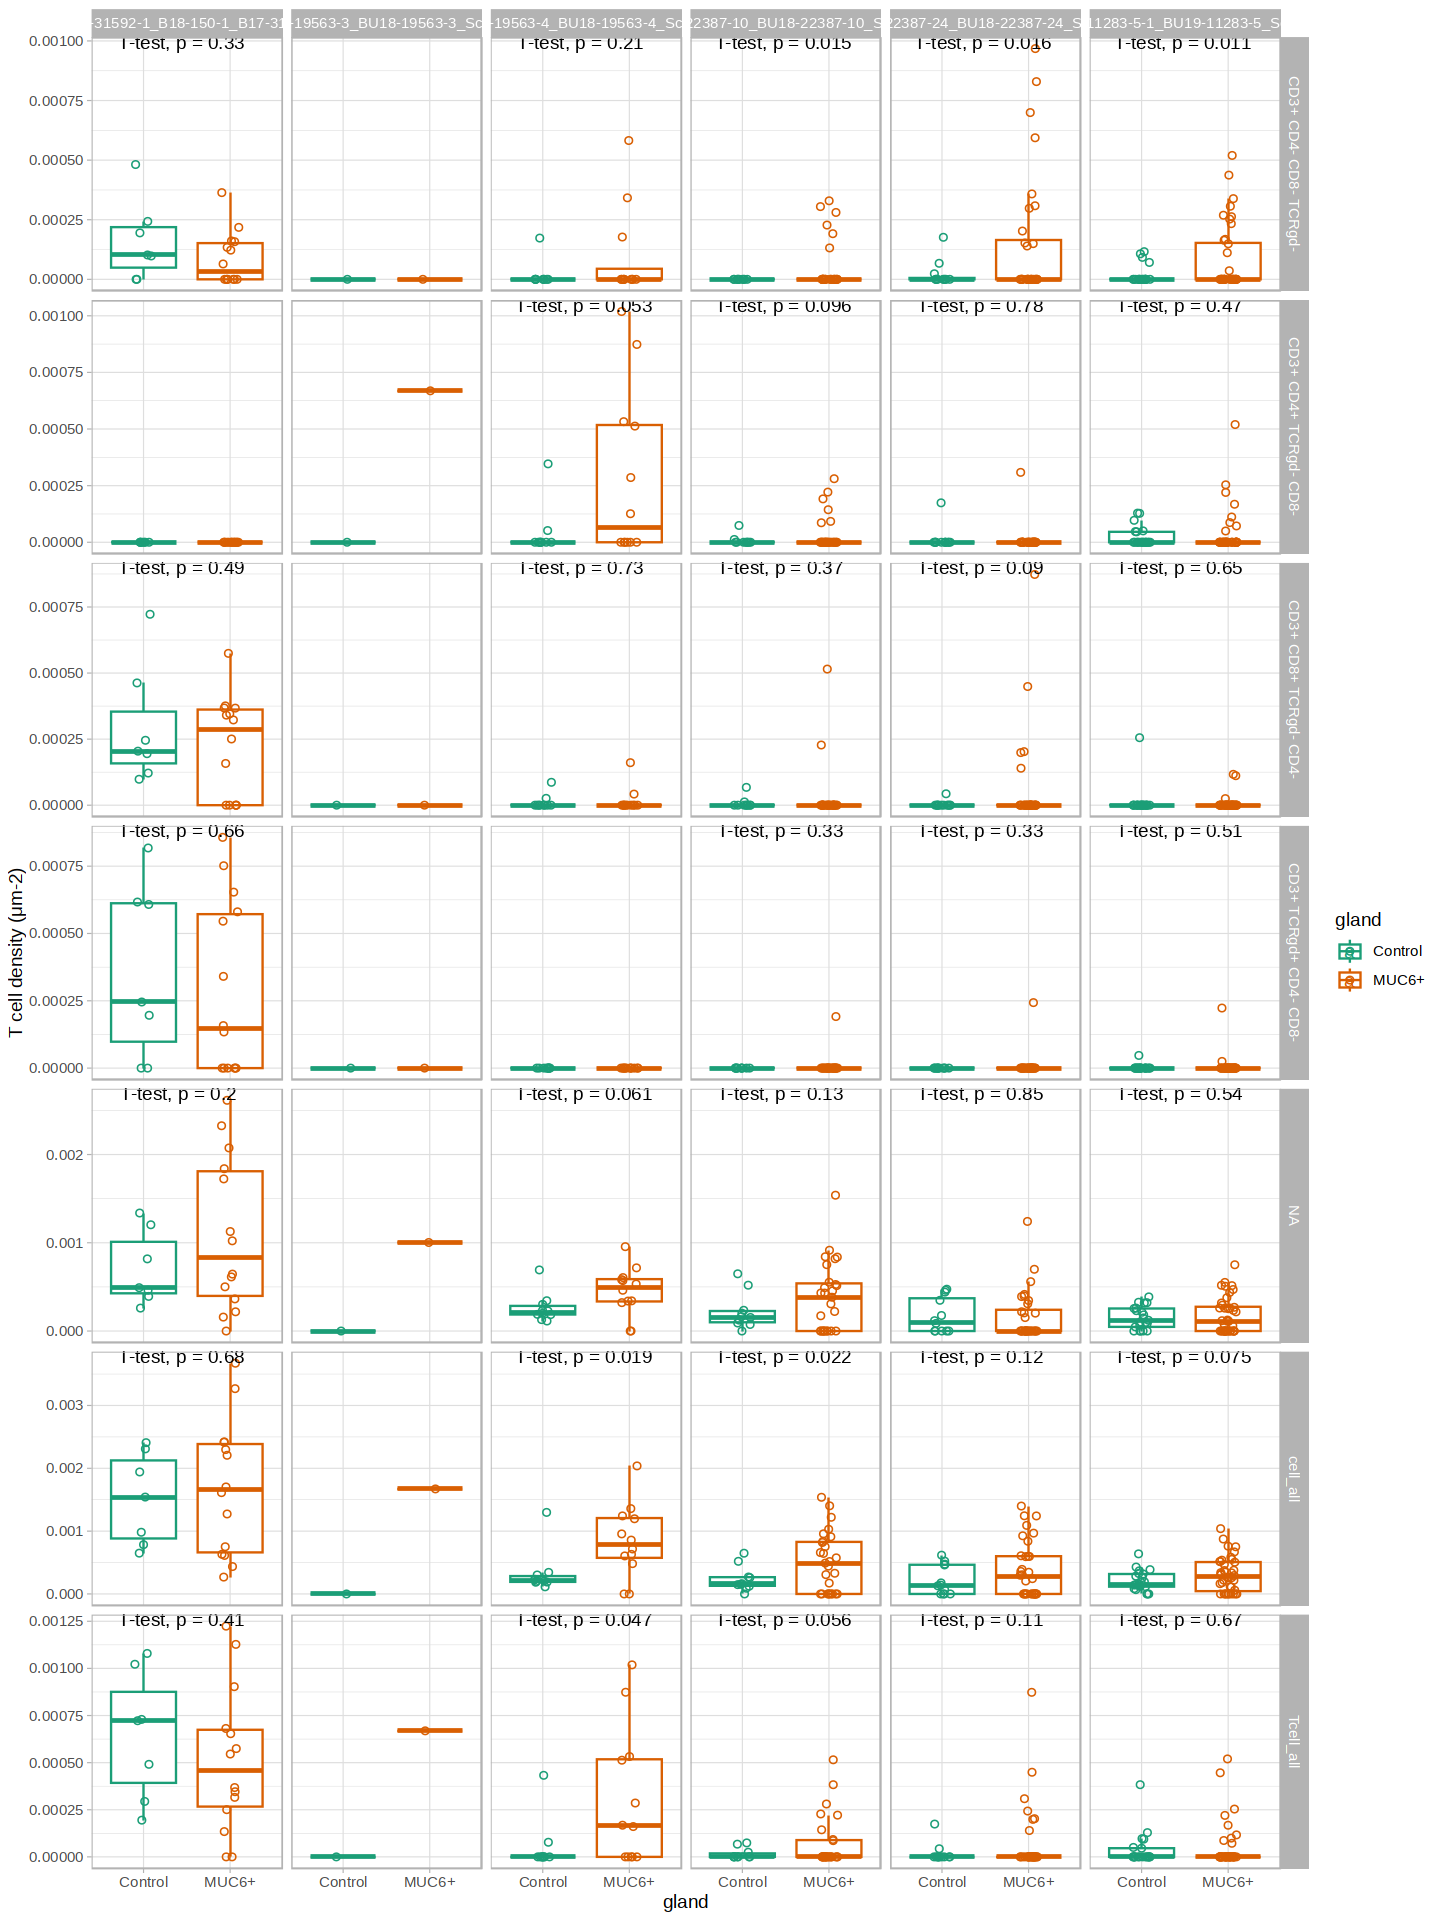

In [18]:
options(warn=-1)  # temporarily suppress warnings

width=12; height=16
options(repr.plot.width = width, repr.plot.height = height)

ggplot(tab, aes(x=gland, y=cell_density, col=gland)) +
    facet_grid(variable~., scales="free_y") +
    facet_grid(variable~image, scales="free_y") +

    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.1, pch=21) +
    stat_compare_means(method = "t.test") +

    #theme_classic()
    ylab("T cell density (μm-2)") +
    theme_light() +
    scale_color_brewer(palette = "Dark2")

ggsave("plots/T_cell_density_boxplot_by_image.pdf", width=width, height=height)

options(warn=0)

In [19]:
regions[1, ]

,image_id,image_name,roi_id,shape_id,type,z,t,channel,area (µm²),length (µm),points,min,max,sum,mean,std_dev,Text,Points,counts_CD3+ CD4- CD8- TCRgd-,counts_CD3+ CD4+ TCRgd- CD8-,counts_CD3+ CD8+ TCRgd- CD4-,counts_CD3+ TCRgd+ CD4- CD8-,counts_NA,area_um2,cell_all,Tcell_all
,<int>,<chr>,<int>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,42598,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],36302,40148,polyline,NA,NA,NA,NA,487.278,NA,NA,NA,NA,NA,NA,MUC6_region2a,"13517.75,12628.27 13518.09,12593.15 13526.64,12552.45 13536.16,12531.74 13588.15,12491.79 13637.78,12447.95 13656.83,12436.33 13682.61,12426.86 13698.84,12424.56 13751.59,12424.03 13767.00,12426.74 13784.86,12433.51 13801.83,12445.99 13818.19,12465.10 13830.50,12488.42 13833.82,12504.70 13833.82,12564.82 13831.11,12575.86 13798.10,12630.20 13784.80,12646.67 13752.53,12665.02 13719.76,12666.90 13681.60,12658.46 13657.78,12657.98 13643.40,12665.05 13617.84,12687.90 13601.69,12689.37 13584.01,12685.16 13546.56,12669.41 13529.21,12654.81 13517.25,12619.02 13515.39,12590.28",1,0,5,9,10,15503.44,25,14


In [20]:
colnames(regions)

[1] "image_id"                     "image_name"                  
 [3] "roi_id"                       "shape_id"                    
 [5] "type"                         "z"                           
 [7] "t"                            "channel"                     
 [9] "area (µm²)"                   "length (µm)"                 
[11] "points"                       "min"                         
[13] "max"                          "sum"                         
[15] "mean"                         "std_dev"                     
[17] "Text"                         "Points"                      
[19] "counts_CD3+ CD4- CD8- TCRgd-" "counts_CD3+ CD4+ TCRgd- CD8-"
[21] "counts_CD3+ CD8+ TCRgd- CD4-" "counts_CD3+ TCRgd+ CD4- CD8-"
[23] "counts_NA"                    "area_um2"                    
[25] "cell_all"                     "Tcell_all"

In [21]:
regions$length = regions[, "length (µm)"]

regions$gland[control_regions] = "Control"
regions$gland[!control_regions] = "MUC6+"

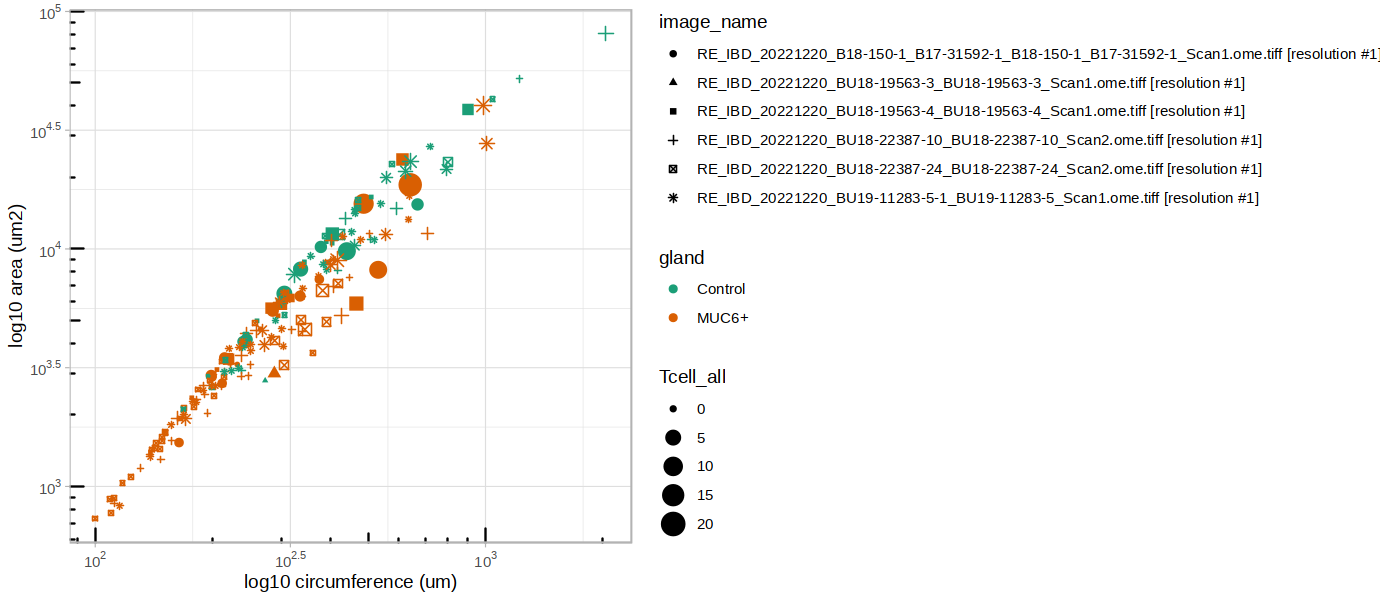

In [22]:
width=11.5; height=5
options(repr.plot.width = width, repr.plot.height = height)

ggplot(regions, aes(x=length, y=area_um2, col=gland, shape=image_name, size=Tcell_all)) +
    geom_point() +
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    annotation_logticks() +
    xlab("log10 circumference (um)") +
    ylab("log10 area (um2)") +
    scale_color_brewer(palette = "Dark2") +
    theme_light()

ggsave("plots/regions_sizes_Tcell_counts_scatter.pdf", width=width, height=height)

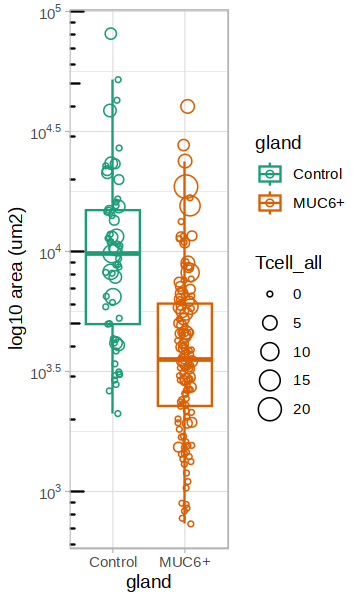

In [23]:
width=3; height=5
options(repr.plot.width = width, repr.plot.height = height)

ggplot(regions, aes(x=gland, y=area_um2, col=gland)) +
    #geom_boxplot() +

    geom_boxplot(outlier.shape = NA) +
    geom_jitter(aes(size=Tcell_all), width = 0.1, pch=21) +

    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    annotation_logticks(sides="l") +
    ylab("log10 area (um2)") +
    scale_color_brewer(palette = "Dark2") +
    theme_light()
                  
ggsave("plots/regions_sizes_Tcell_counts_boxplot.pdf", width=width, height=height)

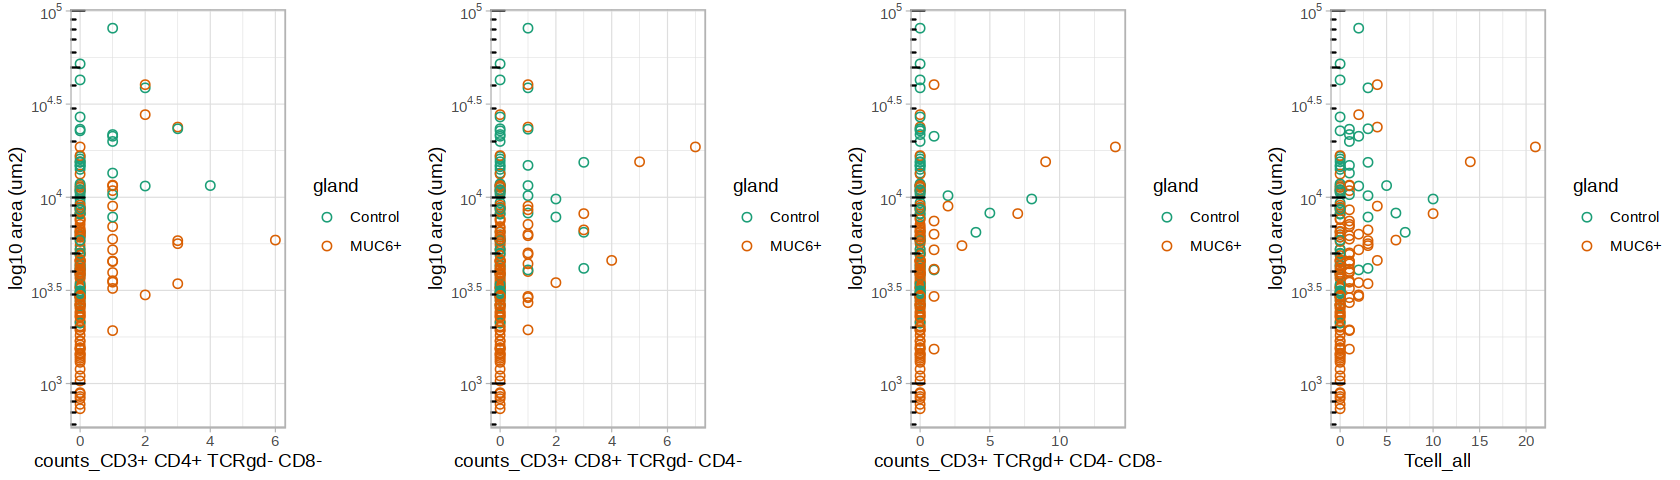

In [24]:
#columns = c("Tcell_all", "Tcell_noCD3rest", "counts_NA", "counts_CD3+ CD4+ TCRgd- CD8-", "counts_CD3+ CD8+ TCRgd- CD4-", "counts_CD3+ TCRgd+ CD4- CD8-")
columns = c("counts_CD3+ CD4+ TCRgd- CD8-", "counts_CD3+ CD8+ TCRgd- CD4-", "counts_CD3+ TCRgd+ CD4- CD8-", "Tcell_all")


plts = lapply(columns, function(col) {
    ggplot(regions, aes(x=.data[[col]], y=area_um2, col=gland)) +
        geom_point(shape=1, size=2) +
        scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
            labels = trans_format("log10", math_format(10^.x))) +
        annotation_logticks(sides="l") +
        ylab("log10 area (um2)") +
        scale_color_brewer(palette = "Dark2") +
        theme_light()
})

width=14; height=4
options(repr.plot.width = width, repr.plot.height = height)
plot_grid(plotlist=plts, nrow=1)
    
ggsave("plots/regions_sizes_Tcell_counts_subtype_scatter.pdf", width=width, height=height)

In [25]:
# # Sanitize column names, replacing: + -> P, - -> N
# regions_renamed = regions
# colnames(regions_renamed) = make.names(gsub("\\-", "N", gsub("\\+", "P", colnames(regions_renamed))))

# colnames(regions_renamed)

In [26]:
# width=6.5; height=5
# options(repr.plot.width = width, repr.plot.height = height)

# ggplot(regions, aes(x=Tcell_all, y=area_um2, col=gland)) +
#     geom_point(shape=1) +
# #     scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
# #         labels = trans_format("log10", math_format(10^.x))) +
#     scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
#         labels = trans_format("log10", math_format(10^.x))) +
#     annotation_logticks(sides="l") +
#     #xlab("log10 circumference (um)") +
#     ylab("log10 area (um2)") +
#     scale_color_brewer(palette = "Dark2") +
#     theme_light()

## Negative bimodial model

In [27]:
regions[1, ]

,image_id,image_name,roi_id,shape_id,type,z,t,channel,area (µm²),length (µm),points,min,max,sum,mean,std_dev,Text,Points,counts_CD3+ CD4- CD8- TCRgd-,counts_CD3+ CD4+ TCRgd- CD8-,counts_CD3+ CD8+ TCRgd- CD4-,counts_CD3+ TCRgd+ CD4- CD8-,counts_NA,area_um2,cell_all,Tcell_all,length,gland
,<int>,<chr>,<int>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
1,42598,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],36302,40148,polyline,NA,NA,NA,NA,487.278,NA,NA,NA,NA,NA,NA,MUC6_region2a,"13517.75,12628.27 13518.09,12593.15 13526.64,12552.45 13536.16,12531.74 13588.15,12491.79 13637.78,12447.95 13656.83,12436.33 13682.61,12426.86 13698.84,12424.56 13751.59,12424.03 13767.00,12426.74 13784.86,12433.51 13801.83,12445.99 13818.19,12465.10 13830.50,12488.42 13833.82,12504.70 13833.82,12564.82 13831.11,12575.86 13798.10,12630.20 13784.80,12646.67 13752.53,12665.02 13719.76,12666.90 13681.60,12658.46 13657.78,12657.98 13643.40,12665.05 13617.84,12687.90 13601.69,12689.37 13584.01,12685.16 13546.56,12669.41 13529.21,12654.81 13517.25,12619.02 13515.39,12590.28",1,0,5,9,10,15503.44,25,14,487.278,MUC6+


In [28]:
# Sanitize column names, replacing: + -> P, - -> N
regions_renamed = regions
colnames(regions_renamed) = make.names(gsub("\\-", "N", gsub("\\+", "P", colnames(regions_renamed))))

colnames(regions_renamed)

[1] "image_id"                     "image_name"                  
 [3] "roi_id"                       "shape_id"                    
 [5] "type"                         "z"                           
 [7] "t"                            "channel"                     
 [9] "area..µm.."                   "length..µm."                 
[11] "points"                       "min"                         
[13] "max"                          "sum"                         
[15] "mean"                         "std_dev"                     
[17] "Text"                         "Points"                      
[19] "counts_CD3P.CD4N.CD8N.TCRgdN" "counts_CD3P.CD4P.TCRgdN.CD8N"
[21] "counts_CD3P.CD8P.TCRgdN.CD4N" "counts_CD3P.TCRgdP.CD4N.CD8N"
[23] "counts_NA"                    "area_um2"                    
[25] "cell_all"                     "Tcell_all"                   
[27] "length"                       "gland"

In [29]:
regions_renamed$gland = "MUC6+"
regions_renamed$gland[grepl("control", regions$Text)] = "Control"
regions_renamed$gland = factor(regions_renamed$gland)

In [30]:
#head(regions_renamed)

In [31]:
fit = glm.nb(counts_CD3P.CD4N.CD8N.TCRgdN ~ gland + log(area_um2), data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = counts_CD3P.CD4N.CD8N.TCRgdN ~ gland + log(area_um2), 
    data = regions_renamed, init.theta = 2.077432901, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4150  -0.8299  -0.6580   0.4308   2.2452  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.4942     1.5465  -4.846 1.26e-06 ***
glandMUC6+      0.8325     0.3252   2.560   0.0105 *  
log(area_um2)   0.6855     0.1606   4.267 1.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(2.0774) family taken to be 1)

    Null deviance: 166.54  on 186  degrees of freedom
Residual deviance: 146.38  on 184  degrees of freedom
AIC: 298.24

Number of Fisher Scoring iterations: 1


              Theta:  2.08 
          Std. Err.:  1.50 

 2 x log-likelihood:  -290.241 

In [32]:
fit = glm.nb(counts_CD3P.CD4P.TCRgdN.CD8N ~ gland + log(area_um2), data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = counts_CD3P.CD4P.TCRgdN.CD8N ~ gland + log(area_um2), 
    data = regions_renamed, init.theta = 0.3996694587, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1157  -0.6422  -0.4960  -0.3269   2.5312  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -12.1688     2.4162  -5.036 4.74e-07 ***
glandMUC6+      1.1093     0.4740   2.340   0.0193 *  
log(area_um2)   1.1578     0.2508   4.617 3.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.3997) family taken to be 1)

    Null deviance: 114.600  on 186  degrees of freedom
Residual deviance:  92.629  on 184  degrees of freedom
AIC: 237.91

Number of Fisher Scoring iterations: 1


              Theta:  0.400 
          Std. Err.:  0.152 

 2 x log-likelihood:  -229.914 

In [33]:
fit = glm.nb(counts_CD3P.CD8P.TCRgdN.CD4N ~ gland + log(area_um2), data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = counts_CD3P.CD8P.TCRgdN.CD4N ~ gland + log(area_um2), 
    data = regions_renamed, init.theta = 0.3161023588, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0779  -0.6741  -0.5284  -0.3949   2.1759  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -9.5874     2.3797  -4.029  5.6e-05 ***
glandMUC6+      0.4150     0.4589   0.905 0.365728    
log(area_um2)   0.9301     0.2513   3.702 0.000214 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.3161) family taken to be 1)

    Null deviance: 108.505  on 186  degrees of freedom
Residual deviance:  93.952  on 184  degrees of freedom
AIC: 252.39

Number of Fisher Scoring iterations: 1


              Theta:  0.316 
          Std. Err.:  0.109 

 2 x log-likelihood:  -244.386 

In [34]:
fit = glm.nb(counts_CD3P.TCRgdP.CD4N.CD8N ~ gland + log(area_um2), data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = counts_CD3P.TCRgdP.CD4N.CD8N ~ gland + log(area_um2), 
    data = regions_renamed, init.theta = 0.07319375335, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8753  -0.5149  -0.3762  -0.2751   1.4302  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -15.4351     4.2407  -3.640 0.000273 ***
glandMUC6+      0.1737     0.7677   0.226 0.821002    
log(area_um2)   1.5972     0.4530   3.525 0.000423 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.0732) family taken to be 1)

    Null deviance: 60.262  on 186  degrees of freedom
Residual deviance: 47.867  on 184  degrees of freedom
AIC: 187.74

Number of Fisher Scoring iterations: 1


              Theta:  0.0732 
          Std. Err.:  0.0240 

 2 x log-likelihood:  -179.7370 

In [35]:
fit = glm.nb(counts_NA ~ gland + log(area_um2), data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = counts_NA ~ gland + log(area_um2), data = regions_renamed, 
    init.theta = 1.592801842, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1362  -1.1039  -0.3084   0.3326   3.1162  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.2862     1.0012  -7.278  3.4e-13 ***
glandMUC6+      0.2854     0.1932   1.477     0.14    
log(area_um2)   0.8861     0.1062   8.343  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.5928) family taken to be 1)

    Null deviance: 288.76  on 186  degrees of freedom
Residual deviance: 192.17  on 184  degrees of freedom
AIC: 659.39

Number of Fisher Scoring iterations: 1


              Theta:  1.593 
          Std. Err.:  0.330 

 2 x log-likelihood:  -651.388 

In [36]:
fit = glm.nb(Tcell_all ~ gland + log(area_um2), data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = Tcell_all ~ gland + log(area_um2), data = regions_renamed, 
    init.theta = 0.4233565158, link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.57560  -0.87250  -0.62876  -0.09837   2.20804  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -11.0740     1.8329  -6.042 1.53e-09 ***
glandMUC6+      0.5731     0.3476   1.649   0.0992 .  
log(area_um2)   1.2056     0.1944   6.201 5.60e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.4234) family taken to be 1)

    Null deviance: 175.23  on 186  degrees of freedom
Residual deviance: 136.04  on 184  degrees of freedom
AIC: 440.16

Number of Fisher Scoring iterations: 1


              Theta:  0.4234 
          Std. Err.:  0.0903 

 2 x log-likelihood:  -432.1640 

In [37]:
#plot(fit)

In [38]:
# CD3+CD4+ adjusting for image IDs
fit = glm.nb(counts_CD3P.CD4P.TCRgdN.CD8N ~ gland + log(area_um2) + image_id, data=regions_renamed)
summary(fit)


Call:
glm.nb(formula = counts_CD3P.CD4P.TCRgdN.CD8N ~ gland + log(area_um2) + 
    image_id, data = regions_renamed, init.theta = 0.402840516, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1519  -0.6429  -0.4885  -0.3194   2.4430  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -622.46045 1151.15467  -0.541   0.5887    
glandMUC6+       1.11544    0.47285   2.359   0.0183 *  
log(area_um2)    1.16037    0.25136   4.616  3.9e-06 ***
image_id         0.01433    0.02703   0.530   0.5960    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.4028) family taken to be 1)

    Null deviance: 114.938  on 186  degrees of freedom
Residual deviance:  92.671  on 183  degrees of freedom
AIC: 239.68

Number of Fisher Scoring iterations: 1


              Theta:  0.403 
          Std. Err.:  0.153 

 2 x log-likelihood:  -229.679 

In [39]:
head(count_norm)

,CD3+ CD4- CD8- TCRgd-,CD3+ CD4+ TCRgd- CD8-,CD3+ CD8+ TCRgd- CD4-,CD3+ TCRgd+ CD4- CD8-,NA,cell_all,Tcell_all,gland,image
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,6.450181e-05,0,3.225090e-04,0.0005805163,0.0006450181,0.0016125452,0.0009030253,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
2,9.805735e-05,0,9.805735e-05,0.0001961147,0.0003922294,0.0007844588,0.0002941721,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
3,2.431025e-04,0,1.215512e-04,0.0006077562,0.0013370636,0.0023094735,0.0007293074,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
4,0.000000e+00,0,5.745165e-04,0.0000000000,0.0017235496,0.0022980661,0.0005745165,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
5,3.637451e-04,0,0.000000e+00,0.0005456177,0.0003637451,0.0012731079,0.0005456177,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]
6,0.000000e+00,0,3.406632e-04,0.0003406632,0.0010219895,0.0017033158,0.0006813263,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]


In [40]:
# Aggregate density per samples x gland type
count_norm_mean = aggregate(.~gland + image, mean, data=count_norm)

count_norm_mean

gland,image,CD3+ CD4- CD8- TCRgd-,CD3+ CD4+ TCRgd- CD8-,CD3+ CD8+ TCRgd- CD4-,CD3+ TCRgd+ CD4- CD8-,NA,cell_all,Tcell_all
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],1.599648e-04,0.000000e+00,2.927582e-04,3.548204e-04,0.0007091712,0.0015167146,6.475786e-04
MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],8.726803e-05,0.000000e+00,2.216218e-04,2.872054e-04,0.0010875251,0.0016836203,5.088272e-04
Control,RE_IBD_20221220_BU18-19563-3_BU18-19563-3_Scan1.ome.tiff [resolution #1],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000000,0.0000000000,0.000000e+00
MUC6+,RE_IBD_20221220_BU18-19563-3_BU18-19563-3_Scan1.ome.tiff [resolution #1],0.000000e+00,6.687425e-04,0.000000e+00,0.000000e+00,0.0010031137,0.0016718562,6.687425e-04
Control,RE_IBD_20221220_BU18-19563-4_BU18-19563-4_Scan1.ome.tiff [resolution #1],1.730822e-05,3.978837e-05,1.124008e-05,0.000000e+00,0.0002617034,0.0003300401,5.102845e-05
MUC6+,RE_IBD_20221220_BU18-19563-4_BU18-19563-4_Scan1.ome.tiff [resolution #1],9.181030e-05,2.791076e-04,1.690401e-05,0.000000e+00,0.0004523889,0.0008402109,2.960116e-04
Control,RE_IBD_20221220_BU18-22387-10_BU18-22387-10_Scan2.ome.tiff [resolution #1],0.000000e+00,8.653024e-06,7.979510e-06,0.000000e+00,0.0002210429,0.0002376754,1.663253e-05
MUC6+,RE_IBD_20221220_BU18-22387-10_BU18-22387-10_Scan2.ome.tiff [resolution #1],5.429700e-05,3.760783e-05,2.750739e-05,7.091667e-06,0.0003774847,0.0005039886,7.220689e-05
Control,RE_IBD_20221220_BU18-22387-24_BU18-22387-24_Scan2.ome.tiff [resolution #1],2.225330e-05,1.450499e-05,3.593845e-06,0.000000e+00,0.0001753124,0.0002156645,1.809883e-05


In [41]:

tab_mean = melt(count_norm_mean, value.name = "cell_density")

head(tab_mean)

Warning message in melt(count_norm_mean, value.name = "cell_density"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(count_norm_mean). In the next version, this warning will become an error.”
Using gland, image as id variables



,gland,image,variable,cell_density
,<chr>,<chr>,<fct>,<dbl>
1,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,1.599648e-04
2,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,8.726803e-05
3,Control,RE_IBD_20221220_BU18-19563-3_BU18-19563-3_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,0.000000e+00
4,MUC6+,RE_IBD_20221220_BU18-19563-3_BU18-19563-3_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,0.000000e+00
5,Control,RE_IBD_20221220_BU18-19563-4_BU18-19563-4_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,1.730822e-05
6,MUC6+,RE_IBD_20221220_BU18-19563-4_BU18-19563-4_Scan1.ome.tiff [resolution #1],CD3+ CD4- CD8- TCRgd-,9.181030e-05


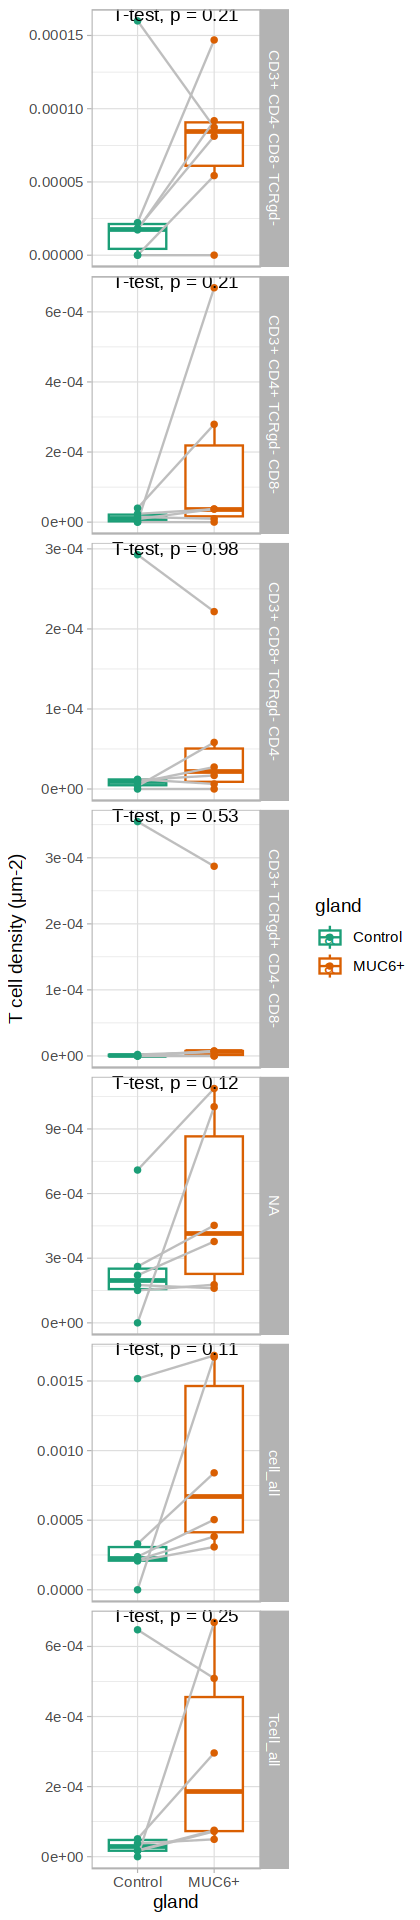

In [42]:
options(warn=-1)  # temporarily suppress warnings

width=3.5; height=16
options(repr.plot.width = width, repr.plot.height = height)

ggplot(tab_mean, aes(x=gland, y=cell_density, col=gland)) +
    facet_grid(variable~., scales="free_y") +
    #facet_grid(variable~image, scales="free_y") +

    geom_boxplot(outlier.shape = NA) +  # hide outlier
    geom_line(aes(group=image), col="grey") +

    geom_jitter(width = 0.0, pch=16) +
    stat_compare_means(method = "t.test", paired = TRUE) +

    #theme_classic()
    ylab("T cell density (μm-2)") +
    theme_light() +
    scale_color_brewer(palette = "Dark2")

ggsave("plots/T_cell_density_mean_boxplot.pdf", width=width, height=height)

options(warn=0)

In [43]:
tab_mean[tab_mean$variable == "CD3+ CD4+ TCRgd- CD8-", ]

,gland,image,variable,cell_density
,<chr>,<chr>,<fct>,<dbl>
13,Control,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,0.000000e+00
14,MUC6+,RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,0.000000e+00
15,Control,RE_IBD_20221220_BU18-19563-3_BU18-19563-3_Scan1.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,0.000000e+00
16,MUC6+,RE_IBD_20221220_BU18-19563-3_BU18-19563-3_Scan1.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,6.687425e-04
17,Control,RE_IBD_20221220_BU18-19563-4_BU18-19563-4_Scan1.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,3.978837e-05
18,MUC6+,RE_IBD_20221220_BU18-19563-4_BU18-19563-4_Scan1.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,2.791076e-04
19,Control,RE_IBD_20221220_BU18-22387-10_BU18-22387-10_Scan2.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,8.653024e-06
20,MUC6+,RE_IBD_20221220_BU18-22387-10_BU18-22387-10_Scan2.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,3.760783e-05
21,Control,RE_IBD_20221220_BU18-22387-24_BU18-22387-24_Scan2.ome.tiff [resolution #1],CD3+ CD4+ TCRgd- CD8-,1.450499e-05


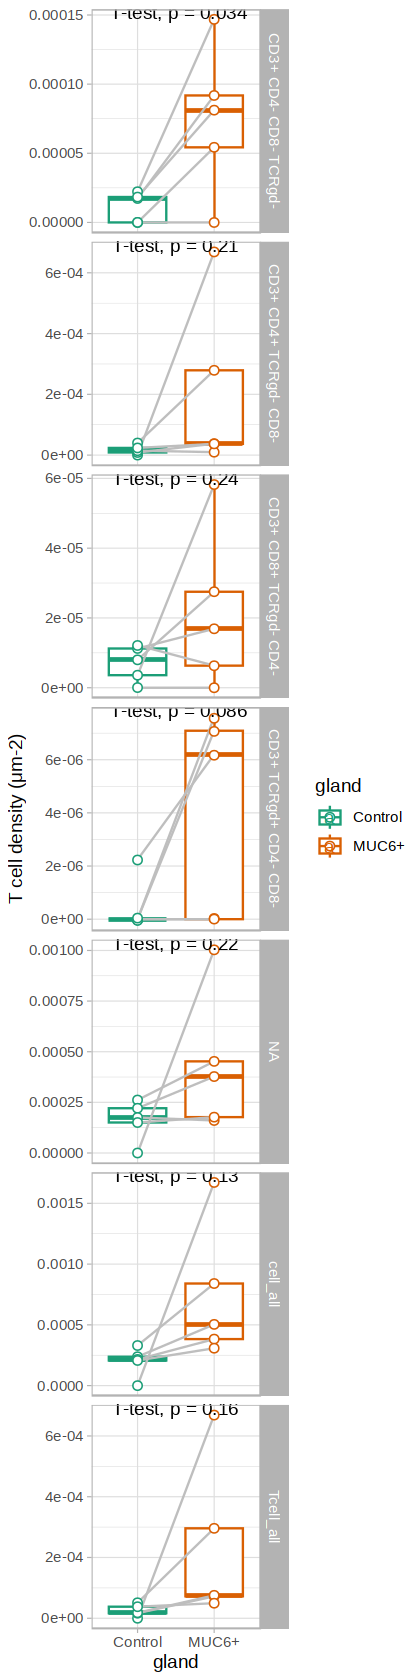

In [44]:
# Paired boxplot and test, excluding celiac sample (CD only samples)
#tab_mean %>% filter(image != "RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]")


options(warn=-1)  # temporarily suppress warnings

width=3.5; height=14
options(repr.plot.width = width, repr.plot.height = height)

ggplot(tab_mean %>% filter(image != "RE_IBD_20221220_B18-150-1_B17-31592-1_B18-150-1_B17-31592-1_Scan1.ome.tiff [resolution #1]"),
       aes(x=gland, y=cell_density, col=gland)) +
    facet_grid(variable~., scales="free_y") +
    #facet_grid(variable~image, scales="free_y") +

    geom_boxplot(outlier.shape = NA) +  # hide outlier
    geom_line(aes(group=image), col="grey") +

    geom_jitter(width = 0.0, pch=21, fill="white", size=2) +
    stat_compare_means(method = "t.test", paired = TRUE) +

    #theme_classic()
    ylab("T cell density (μm-2)") +
    theme_light() +
    scale_color_brewer(palette = "Dark2")

ggsave("plots/T_cell_density_mean_CD_boxplot.pdf", width=width, height=height)

options(warn=0)